## Data Loading

In [129]:
%pip install pandas matplotlib seaborn scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [130]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
df = pd.read_csv('./datasets/bank/bank.csv', sep=';')
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


# Data Exploration - 1

In [132]:
target_col = 'y'
feature_cols = df.drop(target_col, axis=1).columns

(target_col, feature_cols)

('y',
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome'],
       dtype='object'))

In [133]:
df.shape

(4521, 17)

In [134]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


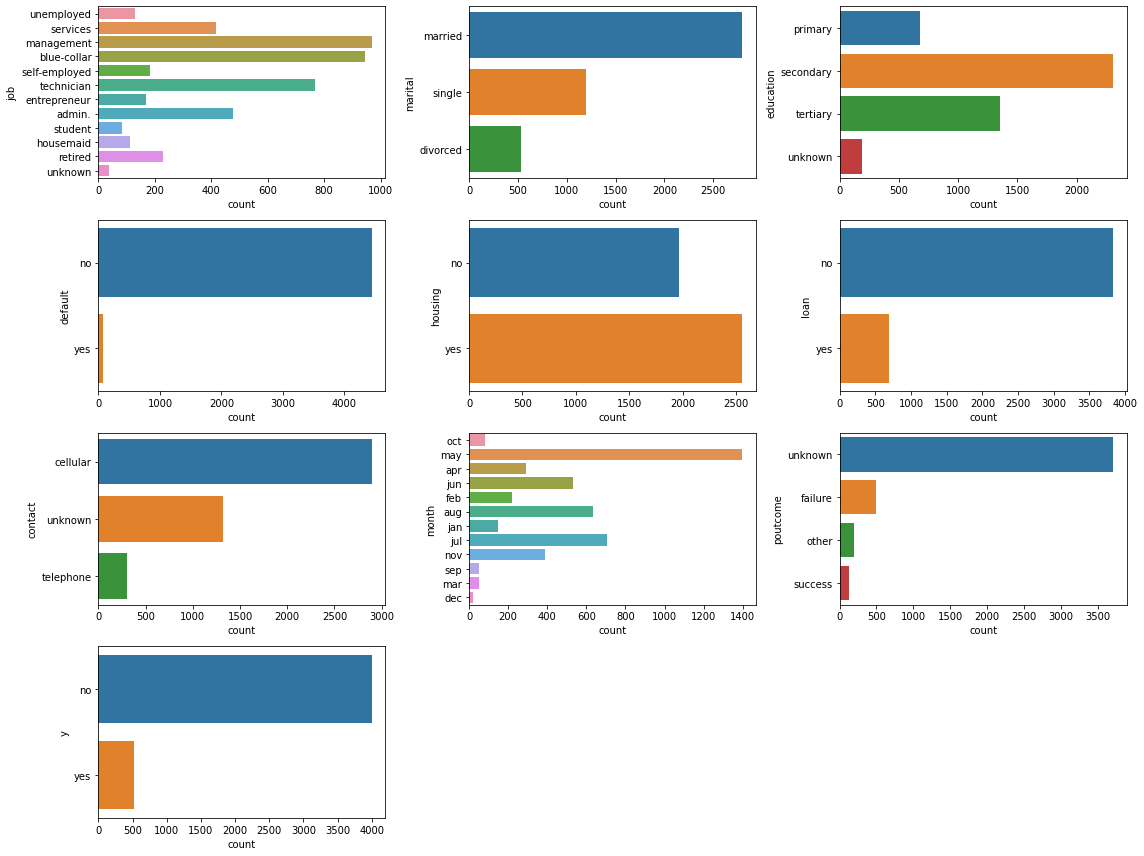

In [136]:
categorical_cols = df.select_dtypes(include='object').columns

def plot_categorical_cols(categorical_cols):
  plt.figure(figsize=(16, 12))
  for i, col in enumerate(categorical_cols, 1):
    plt.subplot(math.ceil(len(categorical_cols)/3), 3, i)
    sns.countplot(df, y=col)
    plt.tight_layout()
  plt.show()
  
plot_categorical_cols(categorical_cols)

# Data Cleaning - 1

In [137]:
# df = df.drop(df[df['job'] == 'unknown'].index)
# df = df.drop(df[df['education'] == 'unknown'].index)
# df = df.drop(df[(df['poutcome'] == 'unknown') | (df['poutcome'] == 'other')].index)
# df = df.drop(df[df['contact'] == 'unknown'].index)

# Data Preprocessing - 1

In [138]:
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
# df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [139]:
months = ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

for d in [df]:
  for i, month in enumerate(months, 1):
    d.loc[d['month'] == month, 'month'] = i

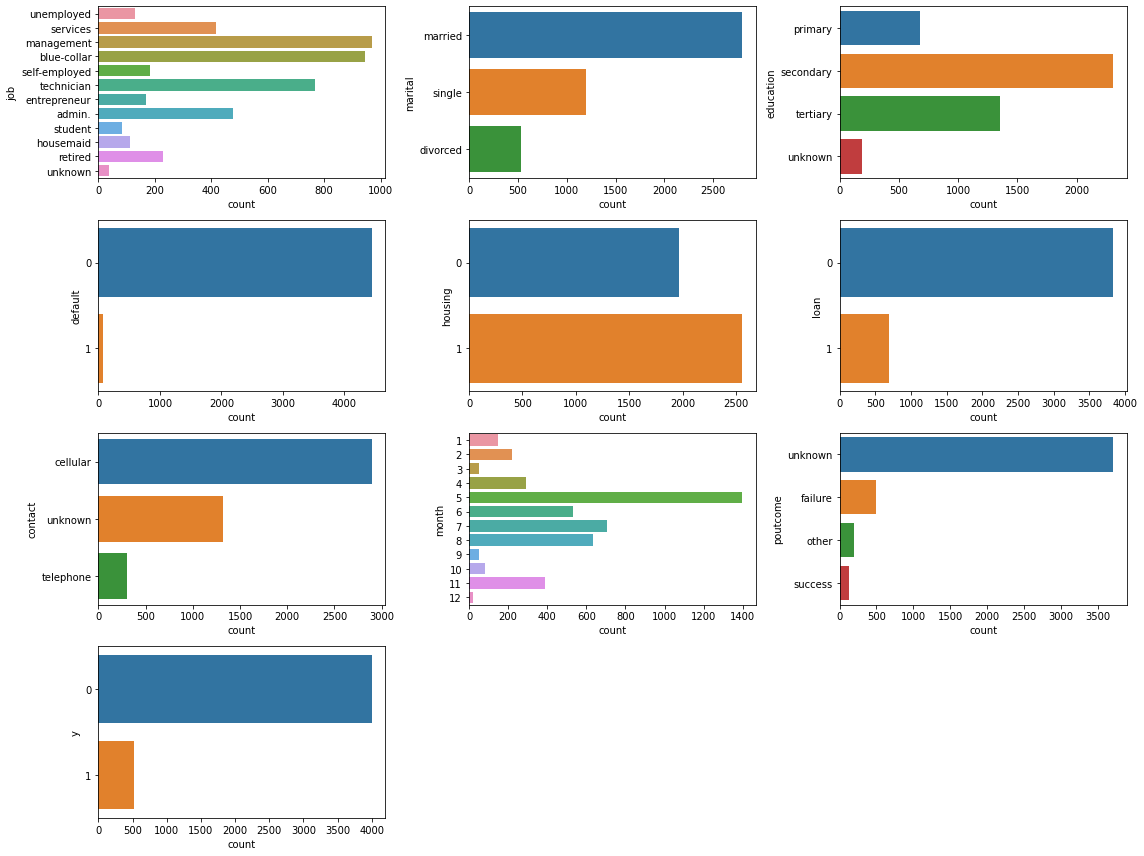

In [140]:
plot_categorical_cols(categorical_cols)

# Data Exploration - 2

In [141]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


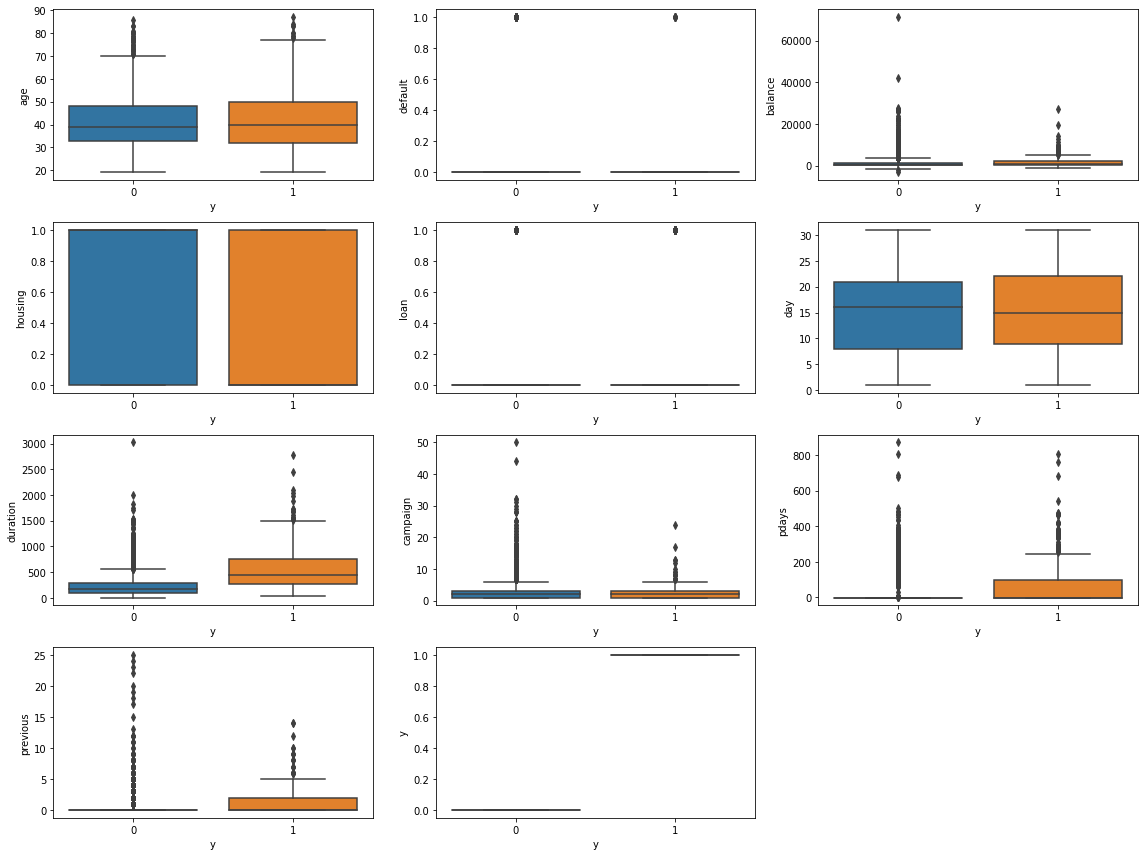

In [142]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(math.ceil(len(numerical_cols)/3), 3, i)
  sns.boxplot(df, y=col, x=target_col)
  plt.tight_layout()
plt.show()

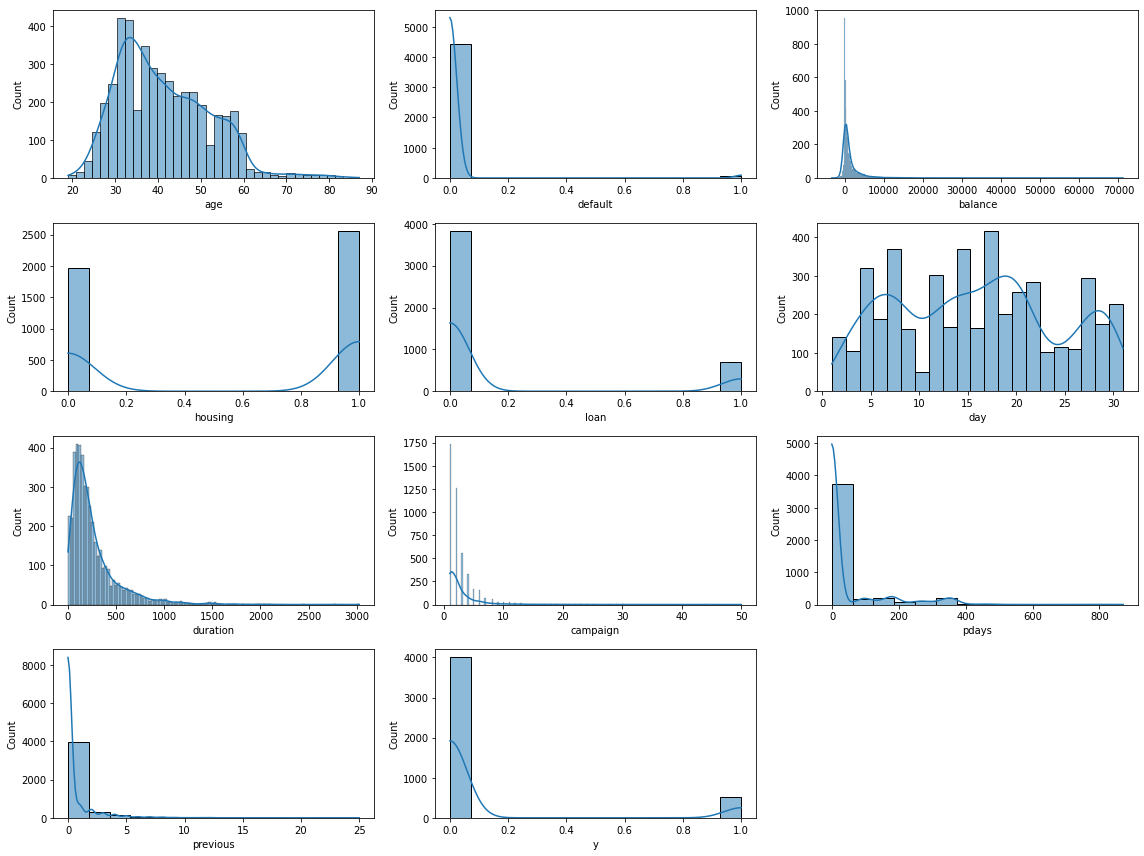

In [143]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(math.ceil(len(numerical_cols)/3), 3, i)
  sns.histplot(df, x=col, kde=True)
  plt.tight_layout()
plt.show()

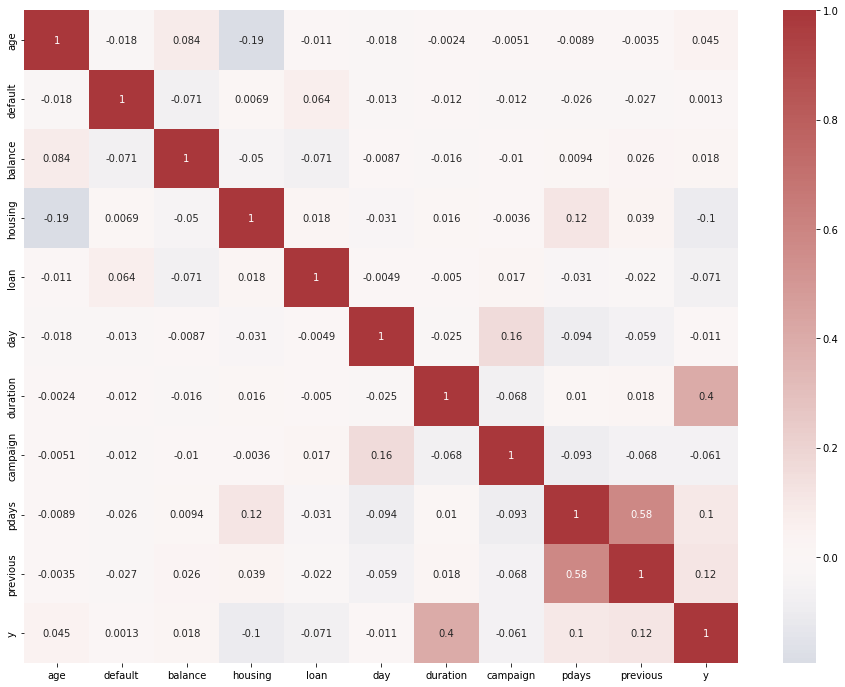

In [144]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='vlag',  center=0)
plt.show()

# Data Preprocessing - 2

In [145]:
one_hot_encoder = OneHotEncoder()

In [146]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [147]:
endoded_categorical_df = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]).toarray(), 
                                      columns=one_hot_encoder.get_feature_names_out())
endoded_categorical_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [148]:
df = df.drop(categorical_cols, axis=1).join(endoded_categorical_df)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,0,4789,1,1,11,220,1,339,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,0,1350,1,0,16,185,1,330,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,0,1476,1,1,3,199,4,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,59,0,0,1,0,5,226,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
feature_cols = df.drop(target_col, axis=1).columns
feature_cols

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [150]:
X = df[feature_cols]
y = df[target_col]

In [151]:
X_cols = list(X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X_cols)

X_scaled.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_7,month_8,month_9,month_10,month_11,month_12,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,...,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03,4.521000e+03
mean,-1.178737e-16,2.750387e-18,-1.571649e-17,1.434130e-16,5.972268e-17,2.357474e-18,-7.622500e-17,-6.286598e-18,-3.889832e-17,3.929124e-18,...,-6.286598e-18,-3.143299e-18,-1.139446e-17,1.807397e-17,3.614794e-17,-1.571649e-18,4.872113e-17,-1.178737e-17,1.571649e-18,-1.041218e-16
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,...,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-2.096455e+00,-1.307588e-01,-1.573671e+00,-1.142051e+00,-4.247561e-01,-1.808625e+00,-1.000513e+00,-5.768295e-01,-4.072183e-01,-3.204128e-01,...,-4.301848e-01,-4.034955e-01,-1.078690e-01,-1.342161e-01,-3.068278e-01,-6.665926e-02,-3.486516e-01,-2.134471e-01,-1.713814e-01,-2.130831e+00
25%,-7.725828e-01,-1.307588e-01,-4.498240e-01,-1.142051e+00,-4.247561e-01,-8.385461e-01,-6.156433e-01,-5.768295e-01,-4.072183e-01,-3.204128e-01,...,-4.301848e-01,-4.034955e-01,-1.078690e-01,-1.342161e-01,-3.068278e-01,-6.665926e-02,-3.486516e-01,-2.134471e-01,-1.713814e-01,4.693005e-01
50%,-2.052091e-01,-1.307588e-01,-3.252105e-01,8.756174e-01,-4.247561e-01,1.027262e-02,-3.038984e-01,-2.552305e-01,-4.072183e-01,-3.204128e-01,...,-4.301848e-01,-4.034955e-01,-1.078690e-01,-1.342161e-01,-3.068278e-01,-6.665926e-02,-3.486516e-01,-2.134471e-01,-1.713814e-01,4.693005e-01
75%,7.404137e-01,-1.307588e-01,1.905496e-02,8.756174e-01,-4.247561e-01,6.165717e-01,2.503146e-01,6.636847e-02,-4.072183e-01,-3.204128e-01,...,-4.301848e-01,-4.034955e-01,-1.078690e-01,-1.342161e-01,-3.068278e-01,-6.665926e-02,-3.486516e-01,-2.134471e-01,-1.713814e-01,4.693005e-01
max,4.333780e+00,7.647669e+00,2.318321e+01,8.756174e-01,2.354292e+00,1.829170e+00,1.062641e+01,1.518152e+01,8.303196e+00,1.444300e+01,...,2.324582e+00,2.478342e+00,9.270507e+00,7.450671e+00,3.259158e+00,1.500167e+01,2.868193e+00,4.685001e+00,5.834939e+00,4.693005e-01


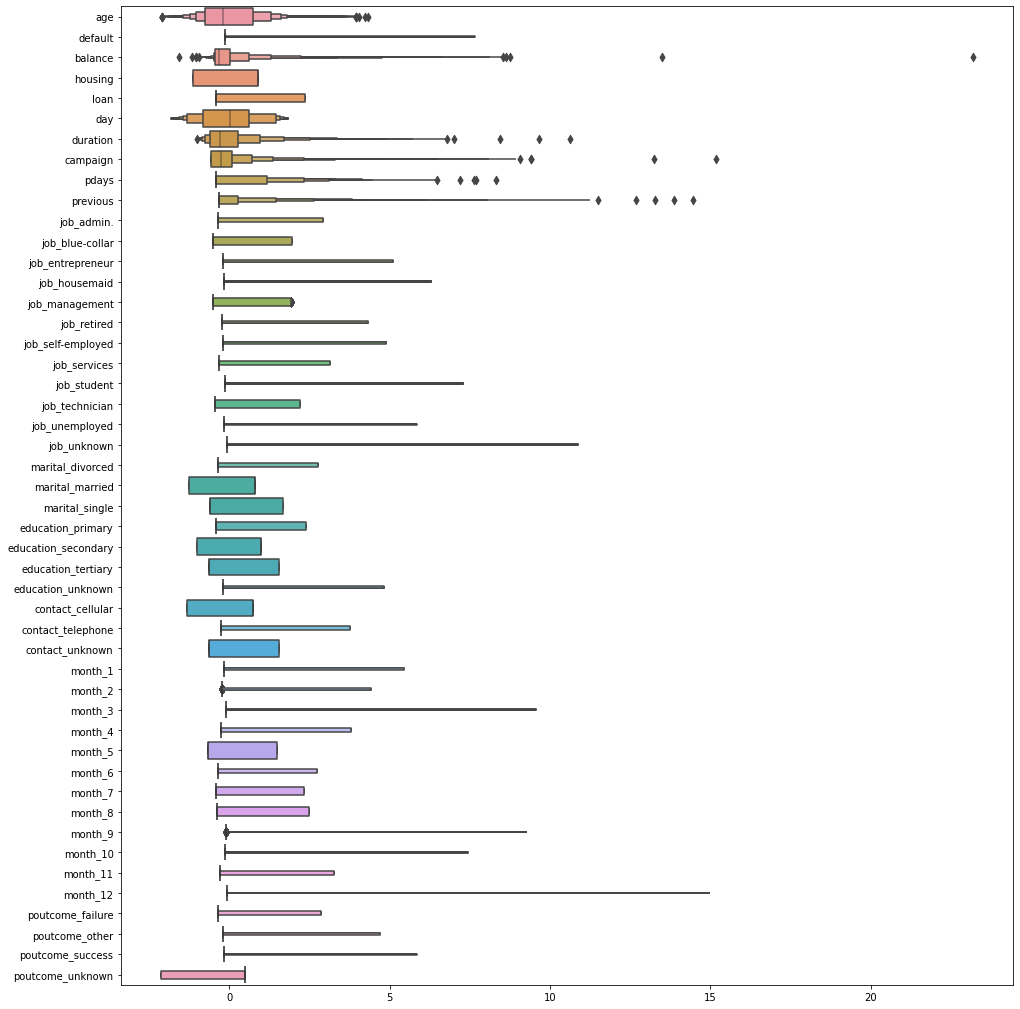

In [158]:
plt.figure(figsize=(16,18))
sns.boxenplot(X_scaled, orient='h')
plt.show()

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

# Modelling

In [ ]:
def plot_confusion_matrix(y_test, y_pred, values):
  cf_matrix = confusion_matrix(y_test, y_pred)
  
  plt.figure(figsize=(8,6))
  sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='PiYG', annot=True)
  plt.xticks(np.array(range(2))+0.5, values)
  plt.yticks(np.array(range(2))+0.5, values)
  plt.show()

## Logistic Regression

In [154]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
clf1_acc = clf1.score(X_test, y_test)

print('Accuracy of Logistic Regression: ', '{:.2f}%'.format(100* clf1_acc))

Accuracy of Logistic Regression:  89.68%


In [155]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1205
           1       0.56      0.35      0.43       152

    accuracy                           0.90      1357
   macro avg       0.74      0.66      0.69      1357
weighted avg       0.88      0.90      0.89      1357

